In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

In [18]:
feature = pd.read_csv('multiasset_feature.csv')
idx = pd.read_csv('multiasset_index.csv')
idx.columns = ['Date', 'Idx_Price']
# idx['Date'] = idx.index
feature.shape, idx.shape

((252, 60), (252, 2))

In [19]:
dt = feature.merge(idx, how='left', on='Date')
dt.shape

(252, 61)

# data exploration

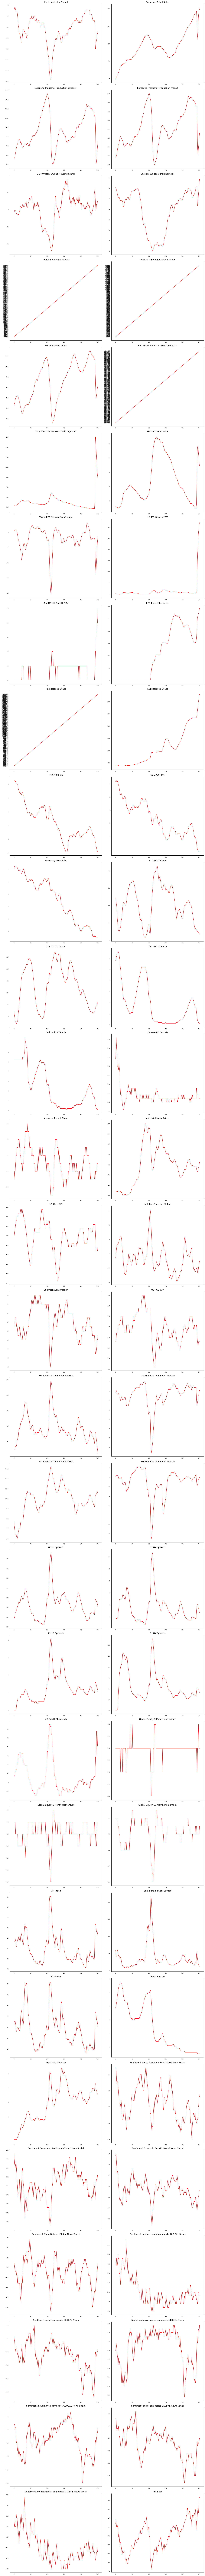

In [23]:
# Plot
df0 = dt.drop('Date', axis=1)

fig, axes = plt.subplots(nrows=30, ncols=2, dpi=120, figsize=(16,200))
for i, ax in enumerate(axes.flatten()):
    data = df0[df0.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df0.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [13]:
dt.describe()

Cycle Indicator Global  Eurozone Retail Sales  \
count              252.000000             252.000000   
mean                -0.074603              99.303175   
std                  0.654611               4.281759   
min                 -2.400000              89.800000   
25%                 -0.400000              96.300000   
50%                  0.100000              98.800000   
75%                  0.325000             101.925000   
max                  0.900000             110.400000   

       Eurozone Industrial Production exconstr  \
count                               252.000000   
mean                                 99.019444   
std                                   4.569505   
min                                  89.800000   
25%                                  95.800000   
50%                                  98.000000   
75%                                 102.725000   
max                                 109.200000   

       Eurozone Industrial Production manuf  \
count                            252.000000   
mean                              97.887698   
std                                5.175568   
min                               87.400000   
25%                               93.950000   
50%                               97.000000   
75%                              102.000000   
max                              107.600000   

       US Privately Owned Housing Starts  US HomeBuilders Market Index  \
count                         252.000000                    252.000000   
mean                            1.003175                     49.209921   
std                            16.199439                     19.818520   
min                           -48.100000                     10.200000   
25%                            -2.825000                     33.225000   
50%                             3.900000                     58.400000   
75%                             9.325000                     65.050000   
max                            35.400000                     78.800000   

       US Indus Prod Index  US JoblessClaims Seasonally Adjusted  \
count           252.000000                            252.000000   
mean             96.409524                            386.643651   
std               4.691425                            236.331216   
min              86.600000                            215.100000   
25%              92.400000                            287.275000   
50%              97.200000                            338.350000   
75%             100.525000                            407.575000   
max             103.700000                           2015.100000   

       US U6 Unemp Rate  World EPS forecast 3M Change  US M1 Growth YOY  \
count        252.000000                    252.000000        252.000000   
mean          10.762302                     -2.014286         14.087698   
std            3.096658                      3.855667         43.796596   
min            6.900000                    -20.400000         -1.400000   
25%            8.300000                     -3.200000          3.300000   
50%            9.700000                     -1.450000          6.600000   
75%           13.450000                      0.600000          9.825000   
max           17.000000                      3.200000        320.200000   

       RealUS M1 Growth YOY  FED Excess Reserves  ECB Balance Sheet  \
count            252.000000           252.000000         252.000000   
mean               0.059127          1081.611508        2200.034524   
std                0.073853          1028.008739        1422.141056   
min                0.000000            13.200000         745.300000   
25%                0.000000            19.275000         906.100000   
50%                0.050000          1052.600000        1923.550000   
75%                0.100000          2142.675000        2905.950000   
max                0.500000          2927.500000        6596.300000   

       Real Yield US  US 10yr R

In [5]:
dt.isna().values.any()

False

In [6]:
dt.shape

(252, 61)

In [15]:
# take a look at each features correlation
corr_mat = dt.drop('Date', axis=1).corr()
# corr_mat.to_csv('feature_correlation.csv')
corr_mat

Cycle Indicator Global  \
Cycle Indicator Global                                              1.000000   
Eurozone Retail Sales                                               0.071681   
Eurozone Industrial Production exconstr                             0.196184   
Eurozone Industrial Production manuf                                0.247651   
US Privately Owned Housing Starts                                   0.478088   
US HomeBuilders Market Index                                        0.746219   
US Indus Prod Index                                                 0.416637   
US JoblessClaims Seasonally Adjusted                               -0.446413   
US U6 Unemp Rate                                                   -0.597635   
World EPS forecast 3M Change                                        0.718344   
US M1 Growth YOY                                                   -0.148397   
RealUS M1 Growth YOY                                               -0.285830   
FED Excess Reserves                                                 0.169590   
ECB Balance Sheet                                                   0.158326   
Real Yield US                                                       0.007745   
US 10yr Rate                                                        0.098460   
Germany 10yr Rate                                                  -0.228876   
EU 10Y 2Y Curve                                                    -0.202754   
US 10Y 2Y Curve                                                    -0.464100   
Fed Fwd 6 Month                                                     0.324552   
Fed Fwd 12 Month                                                    0.186096   
Chinese Oil Imports                                                 0.302526   
Japanese Export China                                               0.271491   
Industrial Metal Prices                                            -0.261557   
US Core CPI                                                         0.064212   
Inflation Surprise Global                                          -0.159706   
US Breakeven Inflation                                              0.303301   
US PCE YOY                                                          0.246950   
 US Financial Conditions Index A                                   -0.676467   
 US Financial Conditions Index B                                    0.854540   
 EU Financial Conditions Index A                                   -0.624236   
 EU Financial Conditions Index B                                    0.803100   
US IG Spreads                                                      -0.819873   
US HY Spreads                                                      -0.844092   
EU IG Spreads                                                      -0.779781   
EU HY Spreads                                                      -0.766741   
US Credit Standards                                                -0.639299   
Global Equity 3 Month Momentum                                      0.348631   
Global Equity 6 Month Momentum                                      0.493179   
Global Equity 12 Month Momentum                                     0.603105   
Vix Index                                                          -0.770414   
Commercial Paper Spread                                            -0.585437   
V2x Index                                                          -0.694619   
Eonia Spread                                                       -0.198288   
Equity Risk Premia                                                 -0.379656   
Sentiment Macro Fundamentals Global News Social                     0.146429   
Sentiment Consumer Sentiment Global News Social                     0.323875   
Sentiment Economic Growth Global News Social                        0.466436   
Sentiment Trade Balance Global News Social                          0.313084   
Sentiment environmental composite GLOBAL News         

In [ ]:
# this plot is going to be too big
# scatter_matrix(feature, figsize=(16, 12))

In [ ]:
# convert price to returns
returns = pd.DataFrame()
for price in dt:
    if price not in returns:
        returns[price] = np.log(dt[price]).diff(1)

##  

In [8]:
feature.columns

Index(['Date', 'Cycle Indicator Global', 'Eurozone Retail Sales',
       'Eurozone Industrial Production exconstr',
       'Eurozone Industrial Production manuf',
       'US Privately Owned Housing Starts', 'US HomeBuilders Market Index',
       'US Real Personal Income', 'US Real Personal Income exTrans',
       'US Indus Prod Index', 'Adv Retail Sales US exFood Services',
       'US JoblessClaims Seasonally Adjusted', 'US U6 Unemp Rate',
       'World EPS forecast 3M Change', 'US M1 Growth YOY',
       'RealUS M1 Growth YOY', 'FED Excess Reserves', 'Fed Balance Sheet',
       'ECB Balance Sheet', 'Real Yield US', 'US 10yr Rate',
       'Germany 10yr Rate', 'EU 10Y 2Y Curve', 'US 10Y 2Y Curve',
       'Fed Fwd 6 Month', 'Fed Fwd 12 Month', 'Chinese Oil Imports',
       'Japanese Export China', 'Industrial Metal Prices', 'US Core CPI',
       'Inflation Surprise Global', 'US Breakeven Inflation', 'US PCE YOY',
       ' US Financial Conditions Index A', ' US Financial Conditions Index B

[]

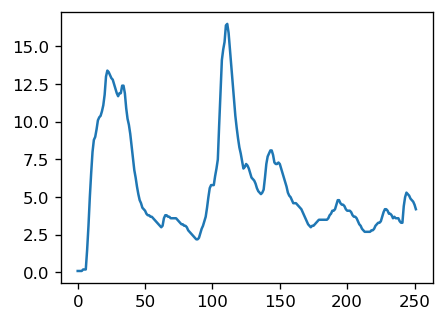

In [16]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':120})
plt.plot(feature['EU HY Spreads'].values)
# plt.title('Equity Index', fontsize=16)
plt.plot()

[]

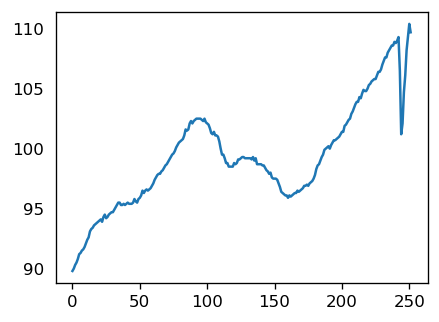

In [12]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':120})
plt.plot(feature['Eurozone Retail Sales'].values)
# plt.title('Equity Index', fontsize=16)
plt.plot()

[]

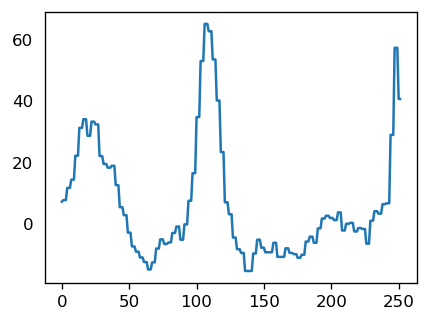

In [13]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':120})
plt.plot(feature['US Credit Standards'].values)
# plt.title('Equity Index', fontsize=16)
plt.plot()

[]

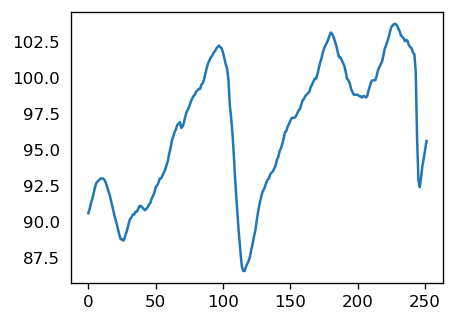

In [14]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':120})
plt.plot(feature['US Indus Prod Index'].values)
# plt.title('Equity Index', fontsize=16)
plt.plot()

[]

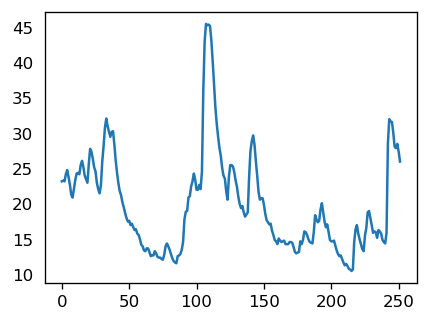

In [15]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':120})
plt.plot(feature['Vix Index'].values)
# plt.title('Equity Index', fontsize=16)
plt.plot()

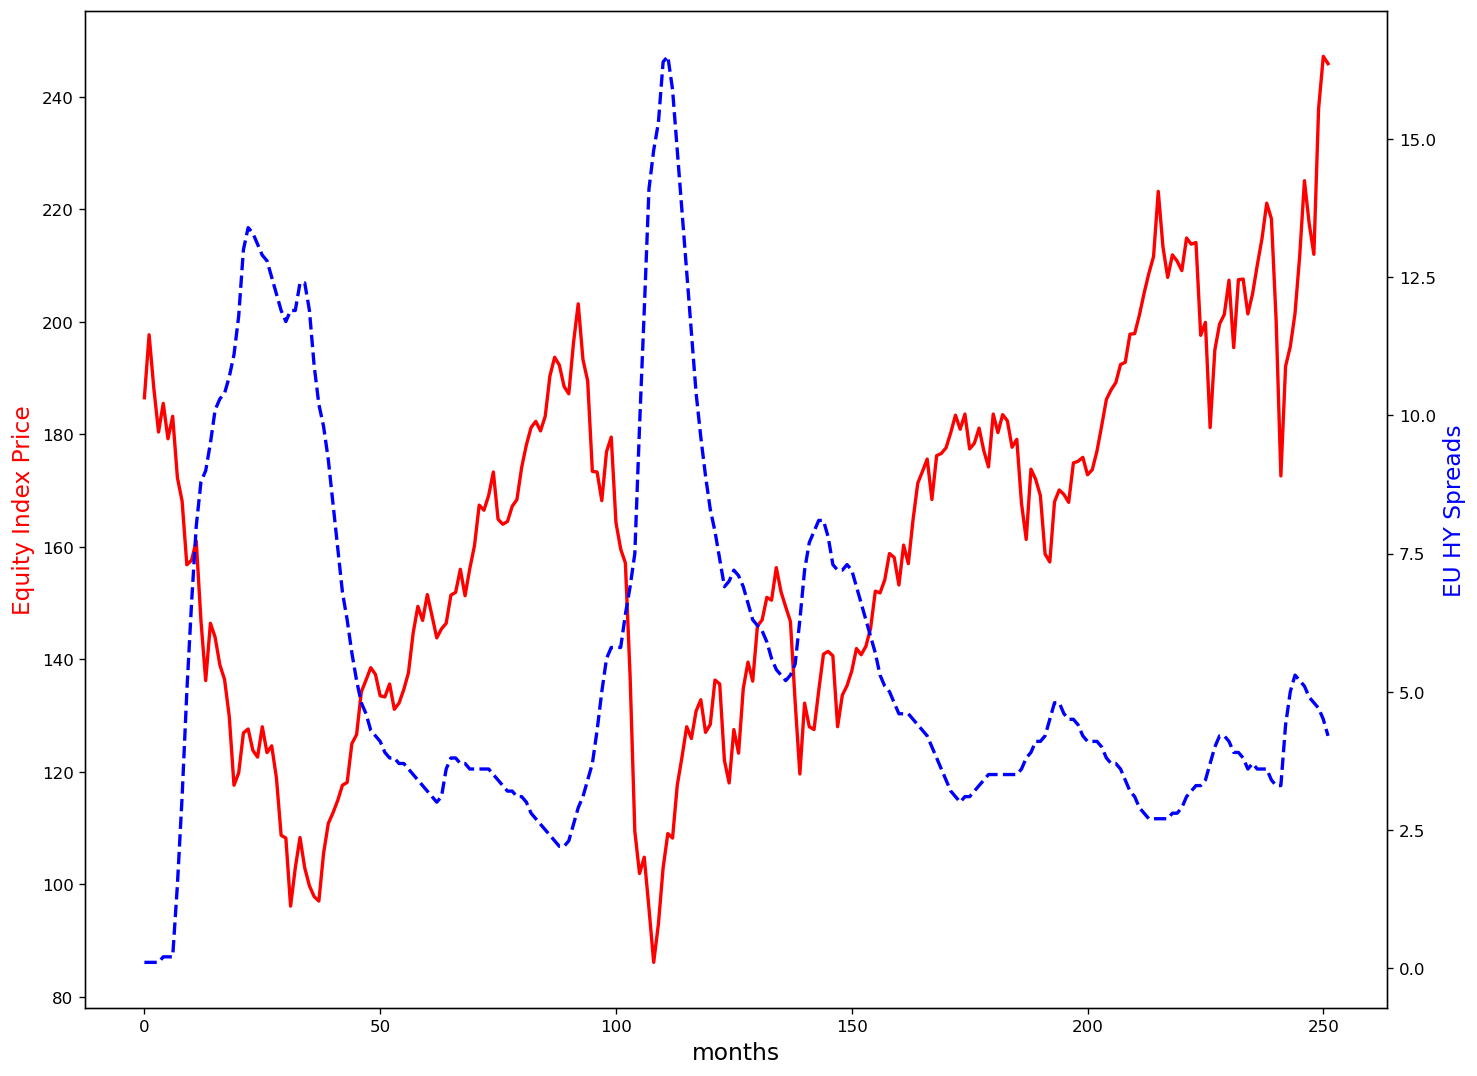

In [24]:
fig,ax = plt.subplots()
ax.plot(idx['Idx_Price'].values, color="red", linewidth=2)
ax.set_xlabel("months",fontsize=14)
ax.set_ylabel("Equity Index Price",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(feature['EU HY Spreads'].values, color='Blue', linewidth=2, linestyle='dashed')
ax2.set_ylabel("EU HY Spreads",color="blue",fontsize=14)
plt.show()

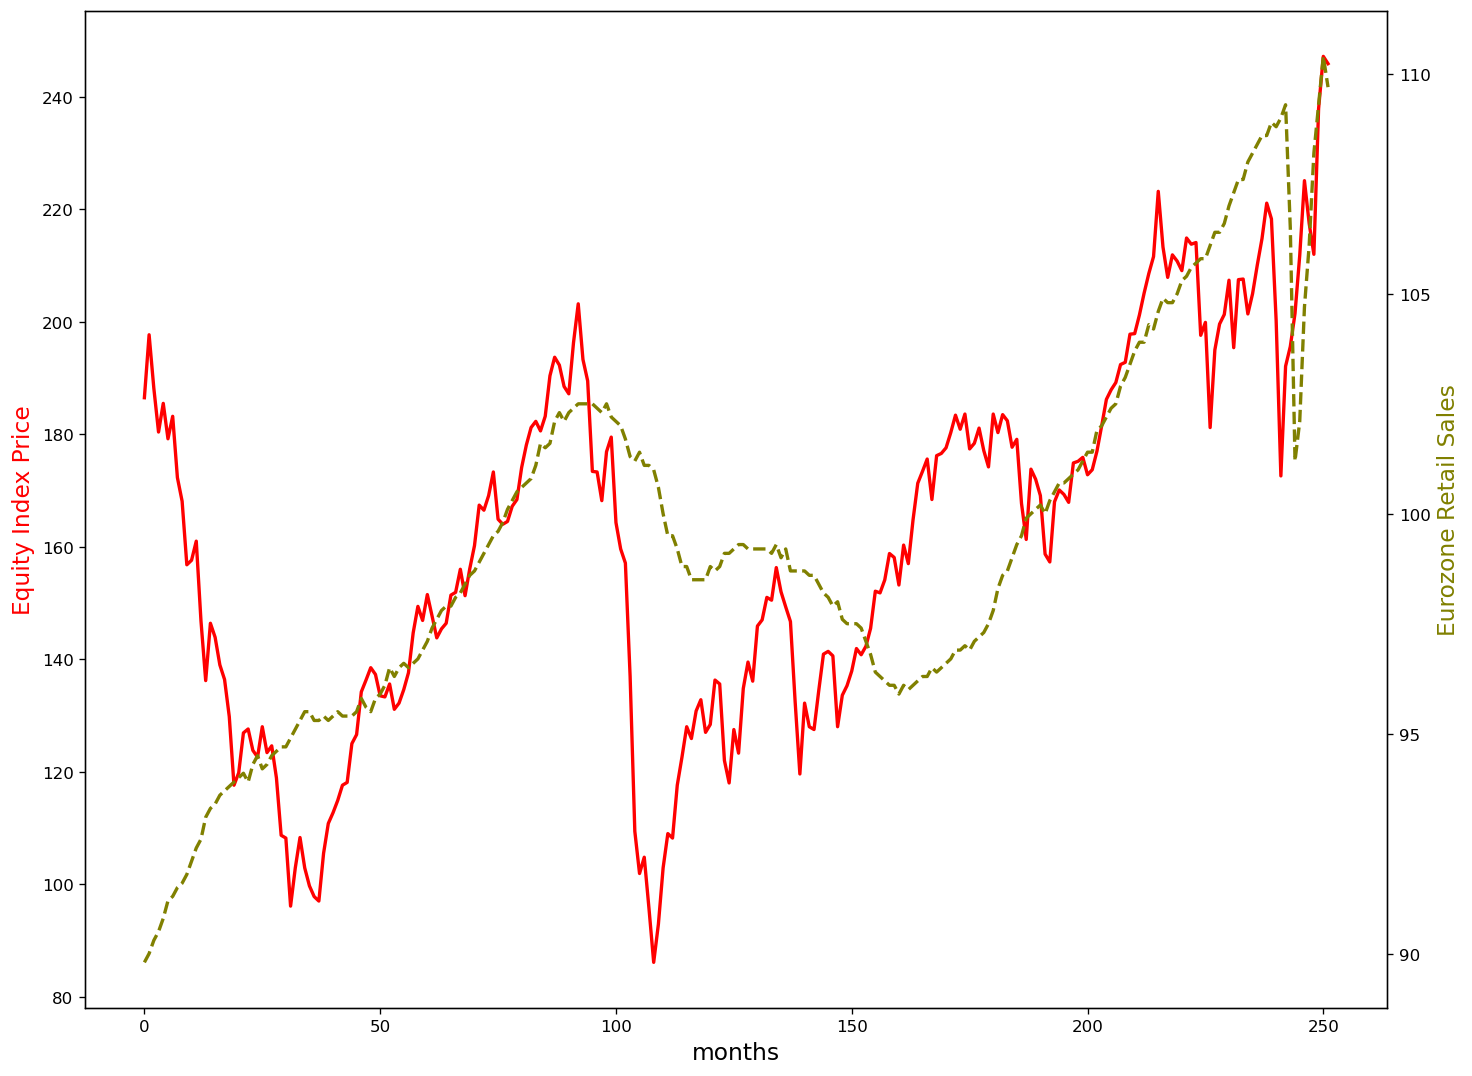

In [25]:
fig,ax = plt.subplots()
ax.plot(idx['Idx_Price'].values, color="red", linewidth=2)
ax.set_xlabel("months",fontsize=14)
ax.set_ylabel("Equity Index Price",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(feature['Eurozone Retail Sales'].values, color='Olive', linewidth=2, linestyle='dashed')
ax2.set_ylabel("Eurozone Retail Sales",color="Olive",fontsize=14)
plt.show()

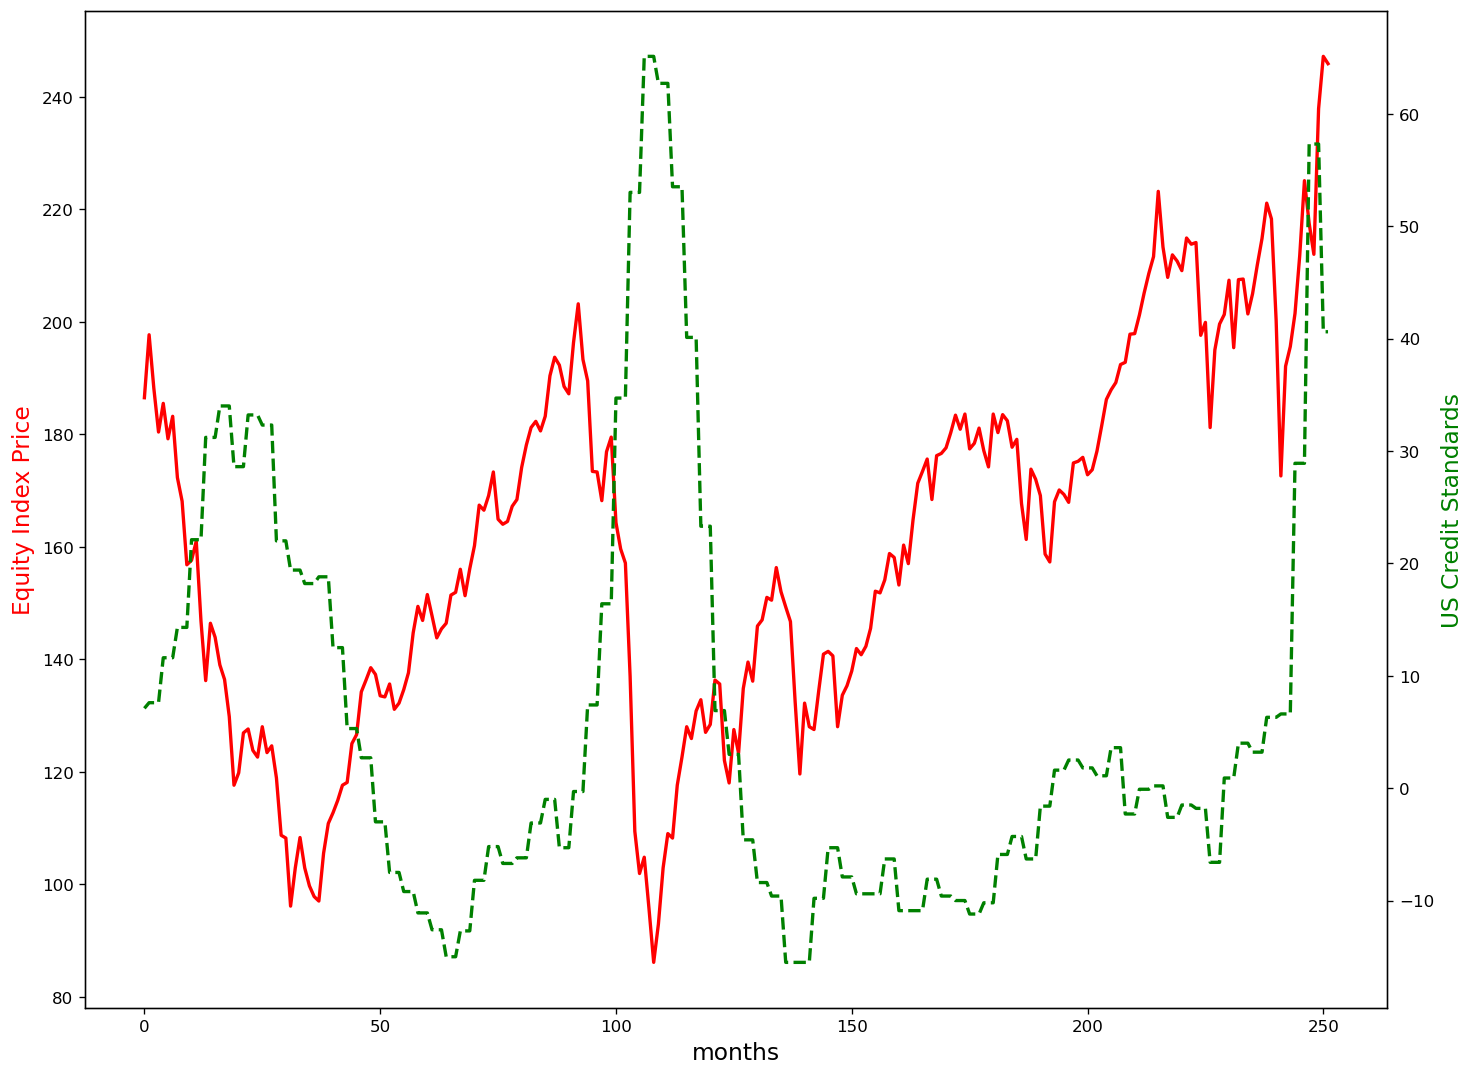

In [27]:
fig,ax = plt.subplots()
ax.plot(idx['Idx_Price'].values, color="red", linewidth=2)
ax.set_xlabel("months",fontsize=14)
ax.set_ylabel("Equity Index Price",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(feature['US Credit Standards'].values, color='Green', linewidth=2, linestyle='dashed')
ax2.set_ylabel('US Credit Standards',color="Green",fontsize=14)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

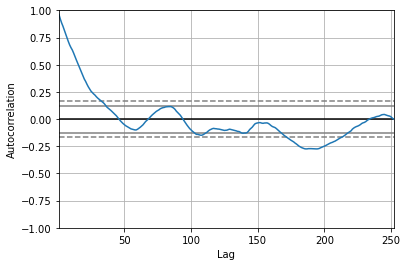

In [69]:
# check autocorrelation: 
# Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time 
# intervals. Autocorrelation measures the relationship between a variable's current value and its past values.
autocorrelation_plot(idx['Idx_Price'])

(0.0, 50.0)

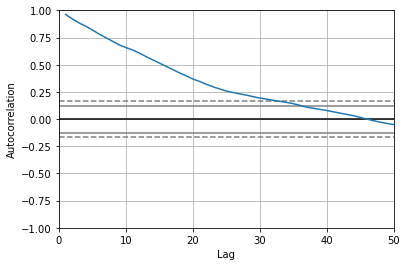

In [43]:
ax = autocorrelation_plot(idx['Idx_Price'])
ax.set_xlim([0, 50])
# 15 days lag has significant correlation.

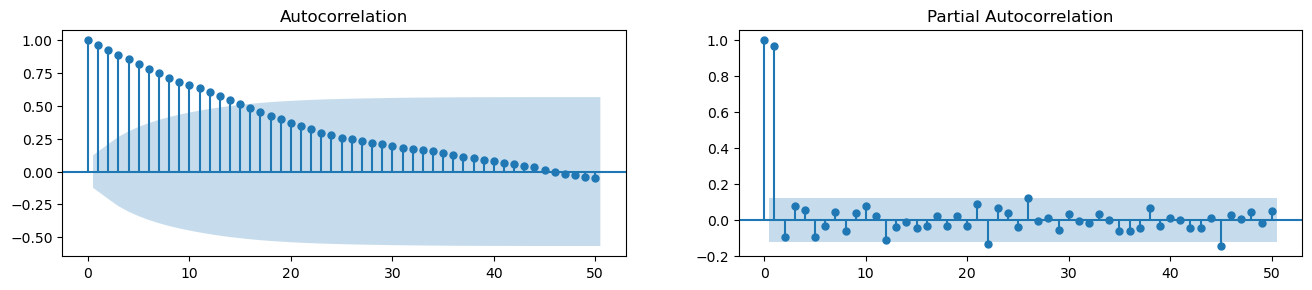

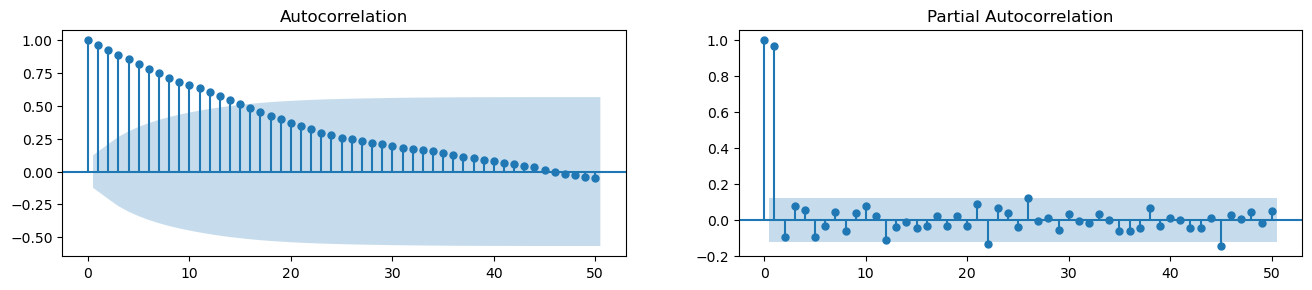

In [121]:
# partial autocorrelation
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(idx['Idx_Price'].tolist(), lags=50, ax=axes[0])
plot_pacf(idx['Idx_Price'].tolist(), lags=50, ax=axes[1])

## Detrend a timeseries

1. Subtract the line of best fit from the time series.
2. Subtract the trend component obtained from time series decomposition we saw earlier.

In [5]:
# Using scipy: Subtract the line of best fit
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

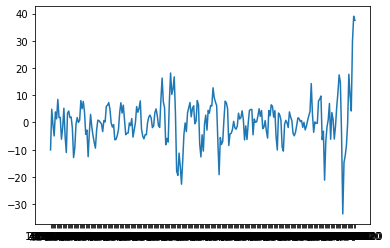

In [109]:
result_mul = seasonal_decompose(idx['Idx_Price'], model='multiplicative', extrapolate_trend='freq', period=12)
detrended = idx['Idx_Price'].values - result_mul.trend
plt.plot(detrended)
# plt.title('Index detrended by subtracting the trend component', fontsize=16)

## test seasonality - ACF plot

When there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

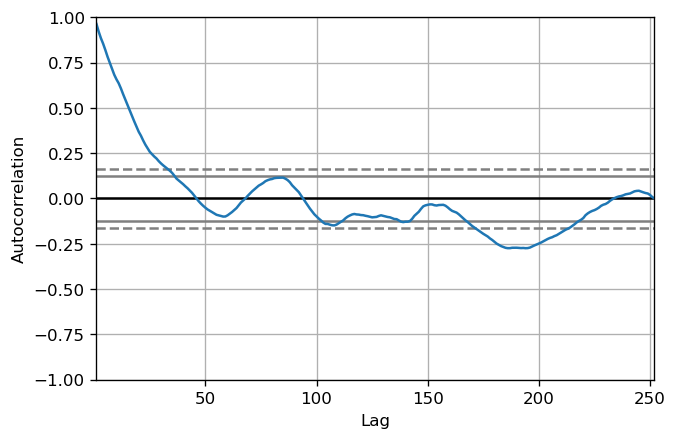

In [118]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
autocorrelation_plot(idx['Idx_Price'].tolist())
# no recognized spike, no seasonality!

## lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [6]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

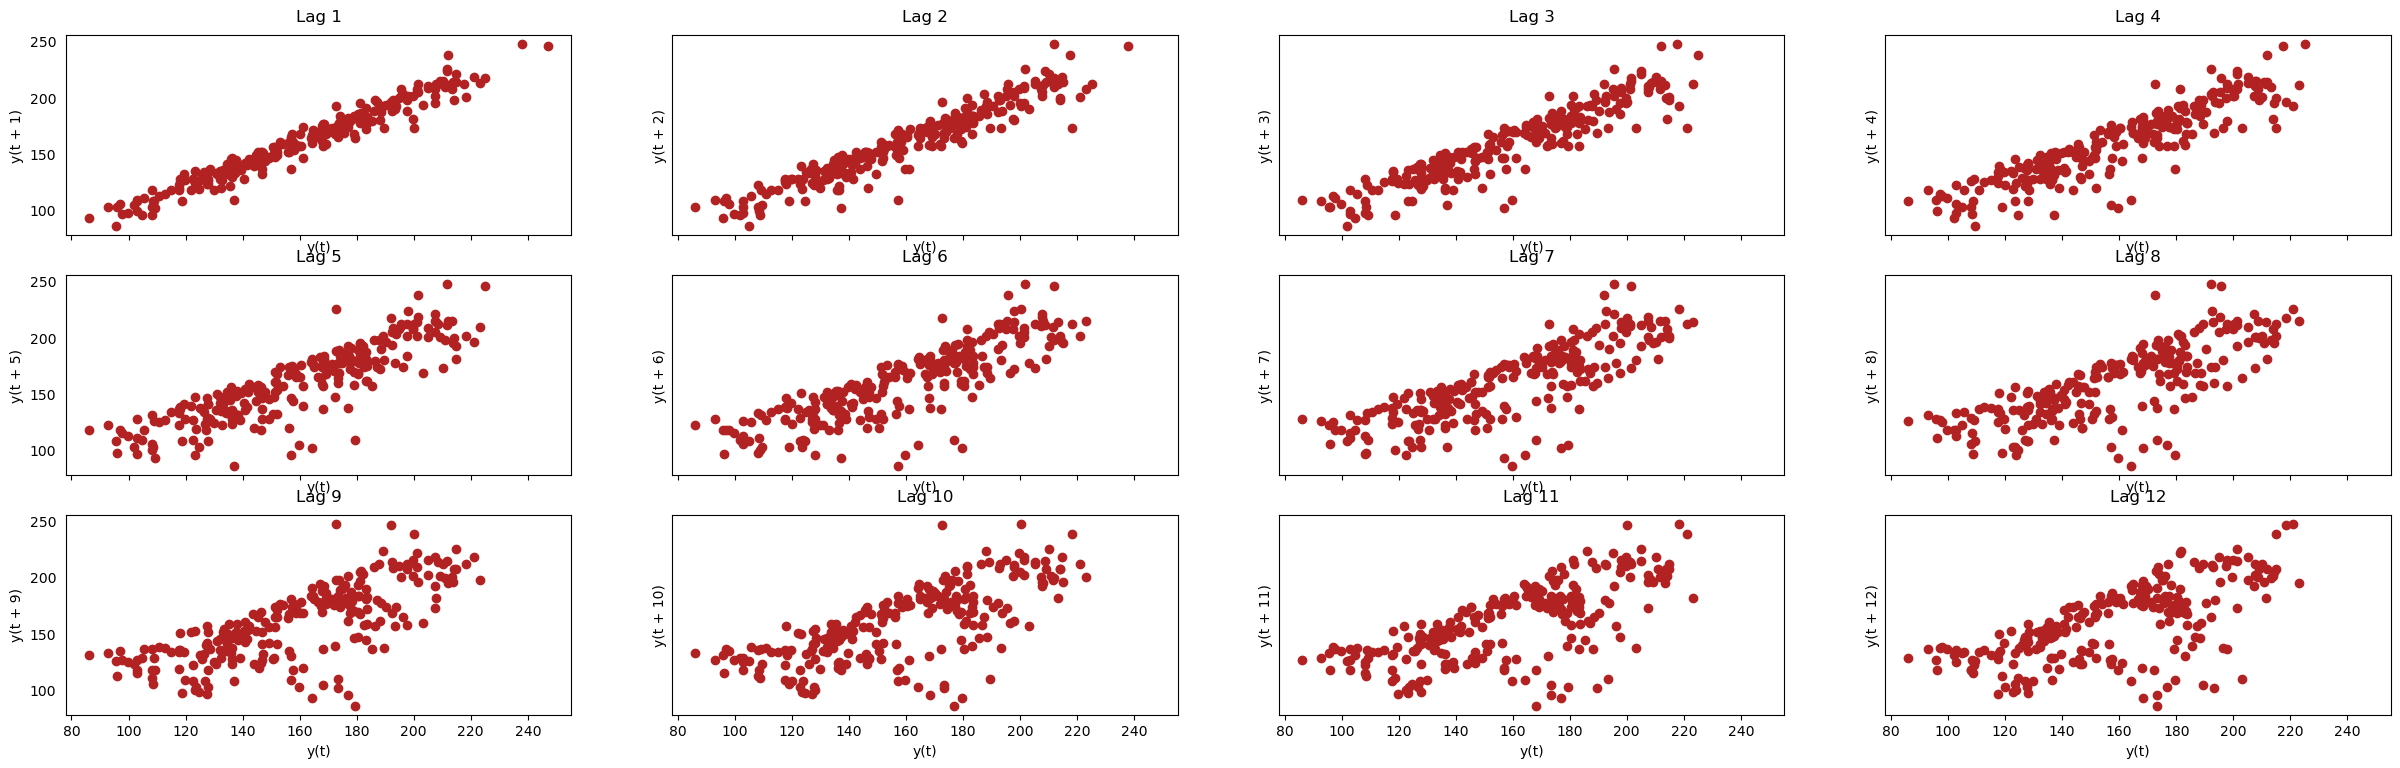

In [7]:
# Plot
fig, axes = plt.subplots(3, 4, figsize=(30,9), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:12]):
    lag_plot(idx['Idx_Price'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

plt.show()

# Benchmark model - ARIMA

## 1. make the time series stationary

Term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors.
- p is the order of the AR term, it refers to the number of lags of Y to be used as predictors.
- q is the order of the MA term, it refers to the number of lagged forecast errors that should do into the ARIMA model.
- d is the number of differencing required to make the time series stationary.

Determine the right order of differencing : 
Get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

Firstly, test series stationary: Augmented Dickey Fuller test.
You need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

In [132]:
# ADF Test
# the null hypothesis is the time series possesses a unit root and is non-stationary.
result = adfuller(idx['Idx_Price'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.106713380531536
p-value: 0.7123872744085853
Critial Values:
   1%, -3.456780859712
Critial Values:
   5%, -2.8731715065600003
Critial Values:
   10%, -2.572968544


In [158]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

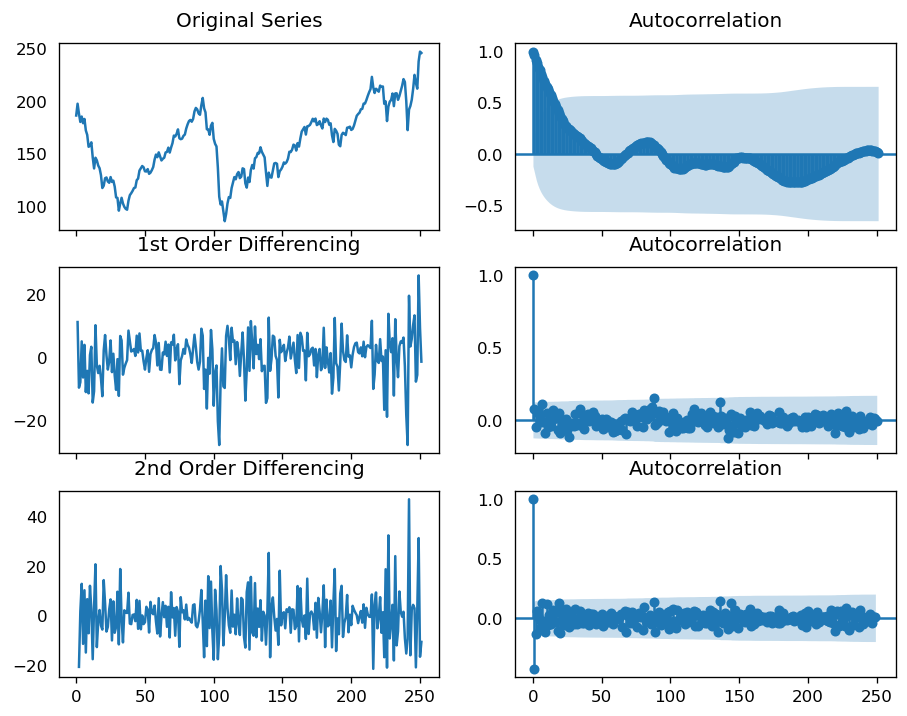

In [155]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(idx['Idx_Price']); axes[0, 0].set_title('Original Series')
plot_acf(idx['Idx_Price'], ax=axes[0, 1], lags=251)

# 1st Differencing
axes[1, 0].plot(idx['Idx_Price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(idx['Idx_Price'].diff().dropna(), ax=axes[1, 1], lags=250)

# 2nd Differencing
axes[2, 0].plot(idx['Idx_Price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(idx['Idx_Price'].diff().diff().dropna(), ax=axes[2, 1], lags=249)

plt.show()

### order of differenceing: d = 1 !!!

## 2. find AR term - p

You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot. Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags.

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

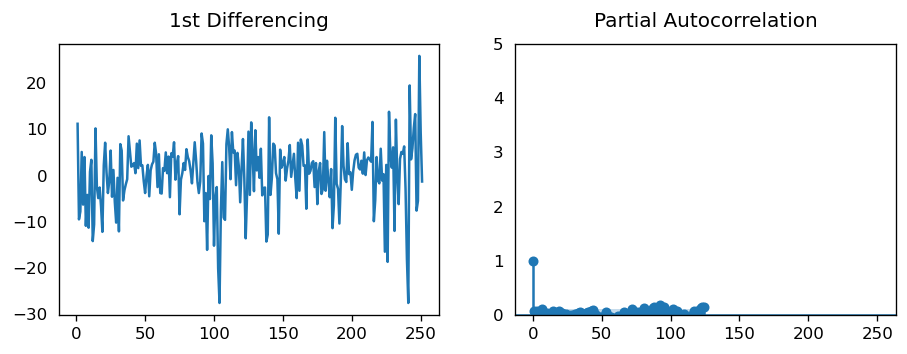

In [165]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(idx['Idx_Price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

plot_pacf(idx['Idx_Price'].diff().dropna(), ax=axes[1], lags=124)

plt.show()

### P = 1!!! 

## 3. find MA term - q

An MA term is technically, the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

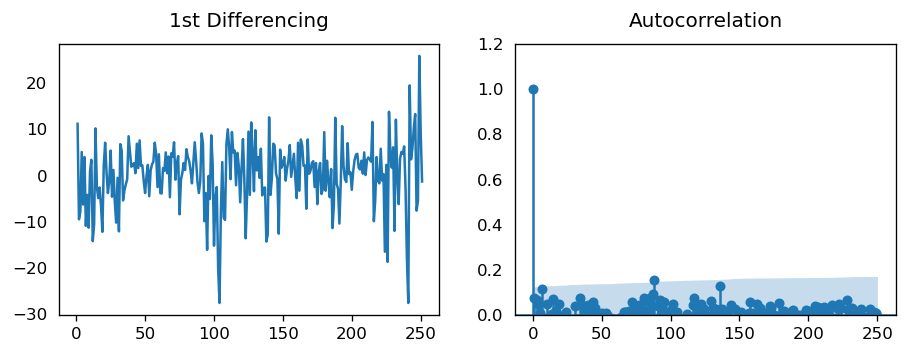

In [166]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(idx['Idx_Price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(idx['Idx_Price'].diff().dropna(), ax=axes[1], lags=250)

plt.show()

### q = 1!!! 

## 4. Build ARIMA model

In [257]:
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model = ARIMA(idx['Idx_Price'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Idx_Price   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -845.643
Method:                       css-mle   S.D. of innovations              7.030
Date:                Sat, 07 Aug 2021   AIC                           1699.287
Time:                        18:43:22   BIC                           1713.388
Sample:                             1   HQIC                          1704.961
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2393      0.469      0.511      0.610      -0.679       1.158
ar.L1.D.Idx_Price    -0.5784      0.311     -1.860      0.063      -1.188       0.031
ma.L1.D.Idx_Price     0.

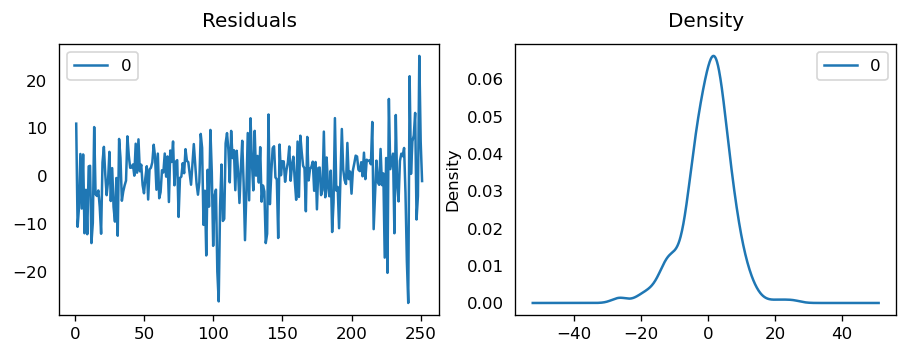

In [172]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

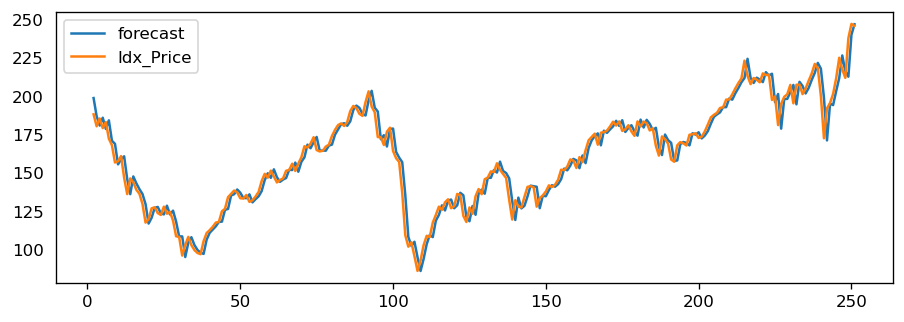

In [173]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)  # When you set dynamic=False the in-sample lagged values are used for prediction.
plt.show()

## 5. Out-of-Time Cross validation to find the optimal ARIMA model

In [267]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = idx['Idx_Price'][:202]  # 80% train, 10% test
test = idx['Idx_Price'][202:]
train.shape, test.shape

((202,), (50,))

In [285]:
np.mean(test)

205.41600000000003

In [282]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test)+2, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:           D2.Idx_Price   No. Observations:                  200
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -652.611
Method:                       css-mle   S.D. of innovations              6.246
Date:                Sat, 07 Aug 2021   AIC                           1317.222
Time:                        19:53:56   BIC                           1337.012
Sample:                             2   HQIC                          1325.231
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0089      0.010      0.920      0.357      -0.010       0.028
ar.L1.D2.Idx_Price     0.1420      0.071      2.003      0.045       0.003       0.281
ar.L2.D2.Idx_Price  

ValueError: Length of passed values is 52, index implies 50.

In [283]:
fc

array([174.78455512, 175.10419387, 175.8733034 , 176.78944455,
       177.59613534, 178.44784709, 179.3407848 , 180.22813702,
       181.12525873, 182.03687307, 182.9560493 , 183.88365507,
       184.82093428, 185.76703054, 186.72186265, 187.68565055,
       188.65831021, 189.63980381, 190.63016246, 191.62938123,
       192.63745207, 193.65437852, 194.68016094, 195.71479799,
       196.75828997, 197.81063706, 198.87183907, 199.94189602,
       201.02080792, 202.10857478, 203.20519657, 204.31067332,
       205.42500501, 206.54819164, 207.68023322, 208.82112974,
       209.9708812 , 211.12948762, 212.29694897, 213.47326527,
       214.65843652, 215.85246271, 217.05534385, 218.26707993,
       219.48767095, 220.71711692, 221.95541783, 223.20257369,
       224.4585845 , 225.72345024, 226.99717094, 228.27974657])

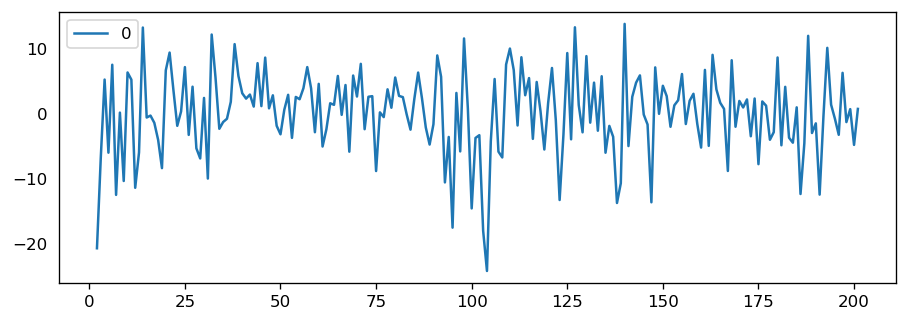

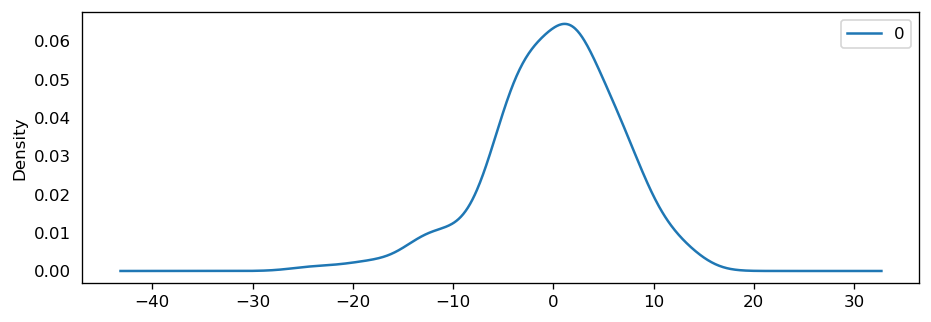

                0
count  200.000000
mean     0.059875
std      6.407899
min    -24.195966
25%     -3.523423
50%      0.723982
75%      4.276538
max     13.754347


In [272]:
# plot residual erros
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### time-series cross validataion

In [288]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
# import statsmodels.api as sm

In [298]:
# Accuracy metrics
def forecast_accuracy(actual, forecast):
    
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
   #  corr = np.corrcoef(forecast, actual)[0,1]   # corr
   #  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
   # maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
   #  minmax = 1 - np.mean(mins/maxs)    # Min-Max
    return({'MSE':mse, 'RMSE':rmse, 'MAE':mae})

In [301]:
tscv = TimeSeriesSplit(n_splits = 10)
rmse = []
mae = []
for train_index, test_index in tscv.split(idx['Idx_Price']):
    cv_train, cv_test = idx['Idx_Price'].iloc[train_index], idx['Idx_Price'].iloc[test_index]
    model = ARIMA(train, order=(3, 2, 1))  
    fitted = model.fit(disp=-1)  
    
    # Forecast
    fc, se, conf = fitted.forecast(len(cv_test), alpha=0.05)  # 95% conf
    
    true_values = cv_test.values
    rmse.append(np.sqrt(mean_squared_error(true_values, fc)))
    mae.append(mean_absolute_error(true_values, fc))
    print(forecast_accuracy(true_values, fc))
    
print("RMSE: {}".format(np.mean(rmse)))
print("MAE: {}".format(np.mean(mae)))

{'MSE': 4251.198788171985, 'RMSE': 65.2012176893345, 'MAE': 64.56414562167252}
{'MSE': 1023.4707745461964, 'RMSE': 31.991729783589328, 'MAE': 31.44141834894525}
{'MSE': 103.00038993301702, 'RMSE': 10.148910775694947, 'MAE': 7.583319140340226}
{'MSE': 4196.161867286535, 'RMSE': 64.77778837909284, 'MAE': 58.31971389531006}
{'MSE': 2305.947269116655, 'RMSE': 48.02027976924599, 'MAE': 46.709600167127064}
{'MSE': 1489.861427363668, 'RMSE': 38.59872313126003, 'MAE': 38.16869107621798}
{'MSE': 52.912345974651764, 'RMSE': 7.2740872949567885, 'MAE': 5.63146879837237}
{'MSE': 126.5944740142845, 'RMSE': 11.251420977560324, 'MAE': 9.91414562167252}
{'MSE': 590.9777244036648, 'RMSE': 24.31003341017171, 'MAE': 22.156778237888798}
{'MSE': 978.8158812510433, 'RMSE': 31.28603332560782, 'MAE': 28.661641202514648}
RMSE: 33.28602245365143
MAE: 31.31509221100614


Around 2.2% MAPE implies the model is about 97.8% accurate in predicting the next 15 observations.